In [224]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [225]:
%matplotlib notebook

In [226]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [227]:
%reload_ext autoreload
%autoreload 2

In [5]:
bdf_discharge = load_dir(dirname='/home/data_transfer/data_from_windows/20200320/Bead1/Discharge/From_plus_to_minus_and_discharge/', 
                         start_file=200, max_file=240)

1145  files in folder
240  files loaded


In [48]:
bdf_discharge2 = load_dir(dirname='/home/data_transfer/data_from_windows/20200320/Bead1/Discharge/Recharge2/', max_file=400)

450  files in folder
400  files loaded


In [6]:
dis_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_discharge]
dis_x = [np.std(bb.response_at_freq2('x', drive_freq=71)) for bb in  bdf_discharge]
dis_y = [np.std(bb.response_at_freq2('y', drive_freq=71)) for bb in  bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [49]:
dis_z2 = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_discharge2]
dis_x2 = [np.std(bb.response_at_freq2('x', drive_freq=71)) for bb in  bdf_discharge2]
dis_y2 = [np.std(bb.response_at_freq2('y', drive_freq=71)) for bb in  bdf_discharge2]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


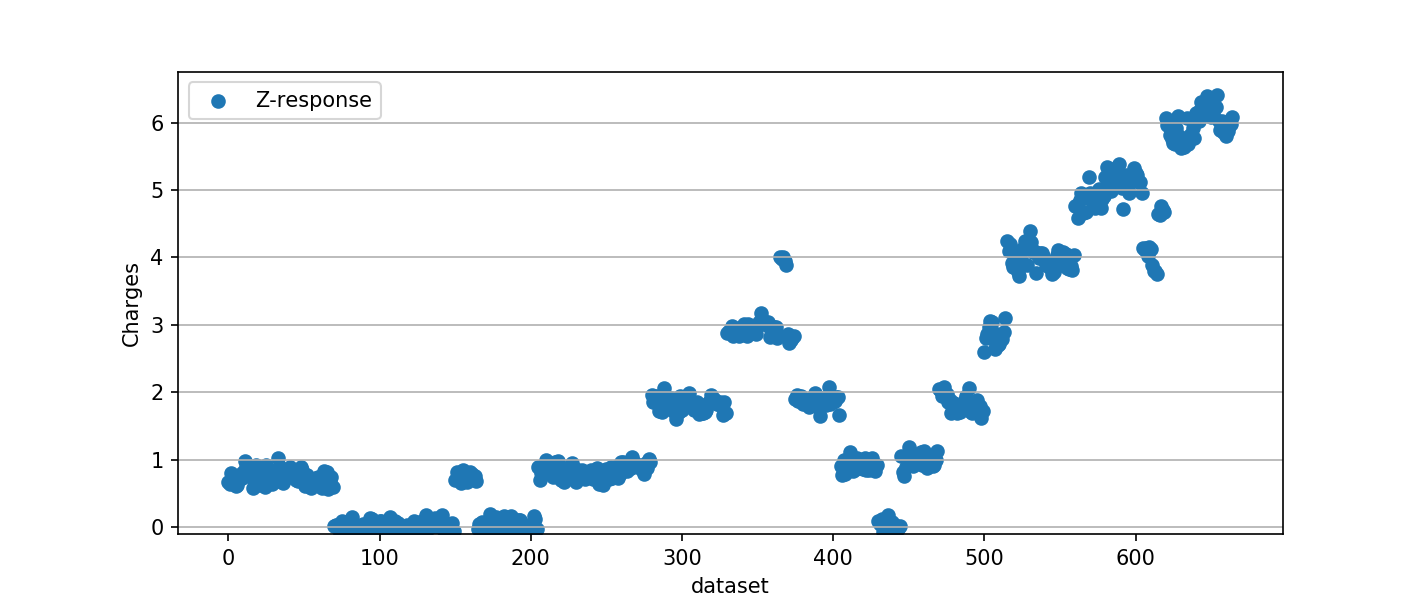

In [279]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(len(dis_y)),(dis_z-offset)/stepz, label='Z-response')
ax.set(xlabel='dataset', ylabel='Charges', ylim=(-0.1,None), xlim=(None,None))
ax.grid(axis='y')
ax.legend()

In [75]:
bdf_discharge[-480]
len(bdf_discharge)

645

<IPython.core.display.Javascript object>


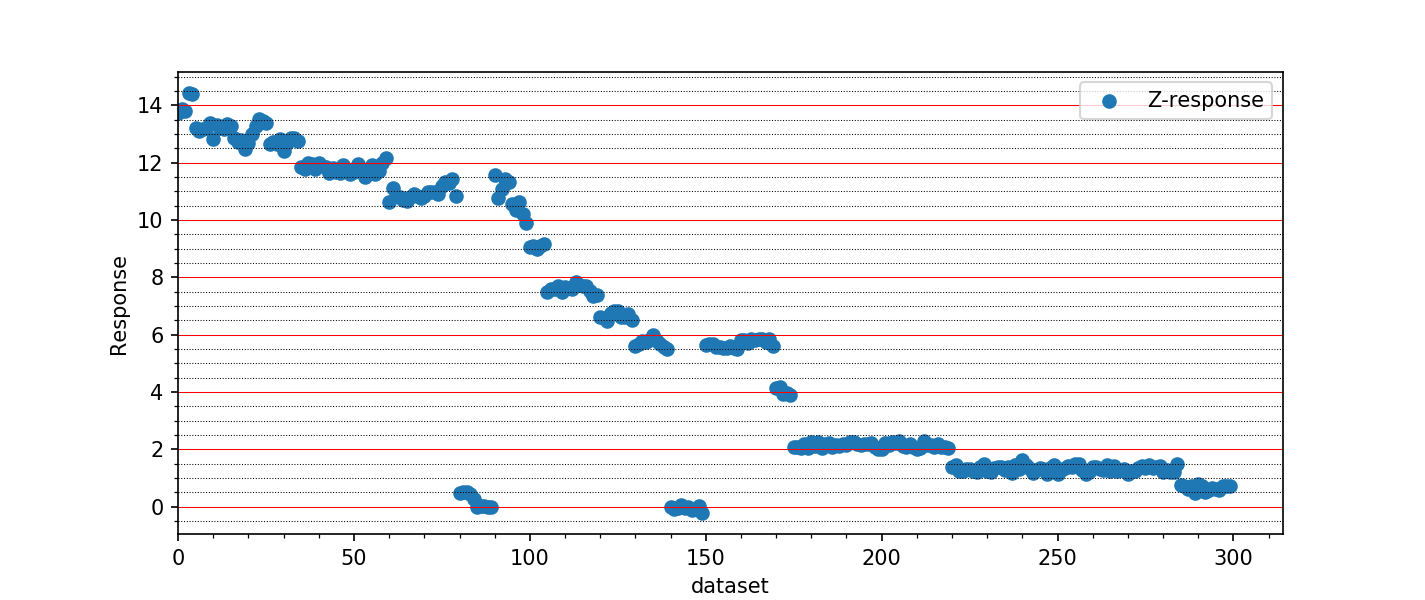

In [77]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(300),np.array(dis_z[-300:])/35-0.5, label='Z-response')
ax.set(xlabel='dataset', ylabel='Response', ylim=(None,None), xlim=(0,None))
ax.minorticks_on()
# Customize the major grid
ax.grid(axis='y', which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(axis='y', which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()

<IPython.core.display.Javascript object>


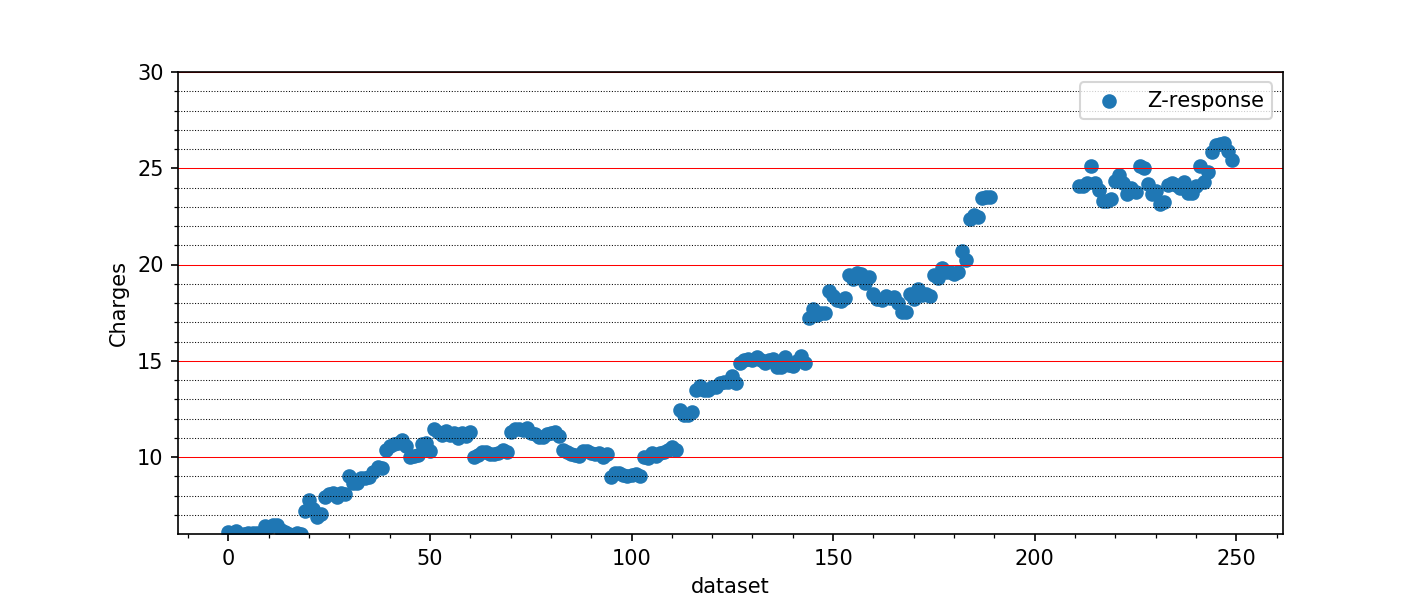

In [359]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(250),(dis_z2[0:250]-offset)/stepz, label='Z-response')
ax.set(xlabel='dataset', ylabel='Charges', ylim=(6,30), xlim=(None,None))
ax.minorticks_on()
# Customize the major grid
ax.grid(axis='y', which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(axis='y', which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()

<IPython.core.display.Javascript object>


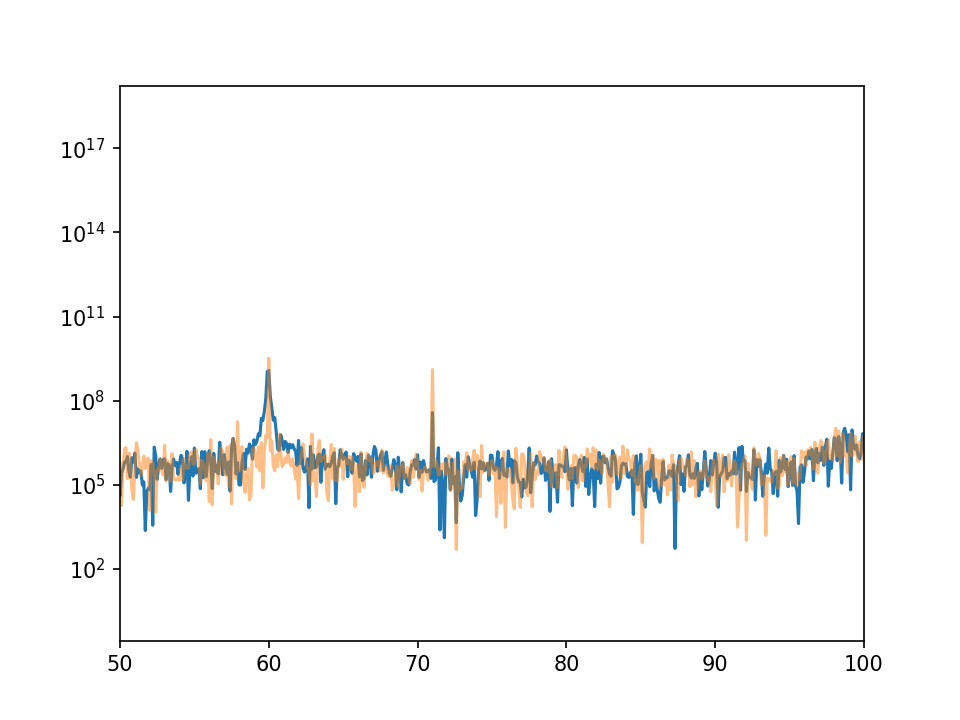

[(50, 100)]

In [17]:
bb = bdf_discharge[100]
bb1 = bdf_discharge[-1]
_,ax = plt.subplots()
ax.semilogy(*bb.psd2('z'))
ax.semilogy(*bb1.psd2('z'), alpha=0.5)
ax.set(xlim=(50,100))

In [18]:
dis_z_time = [bb.response_at_freq2('z', drive_freq=71) for bb in  bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


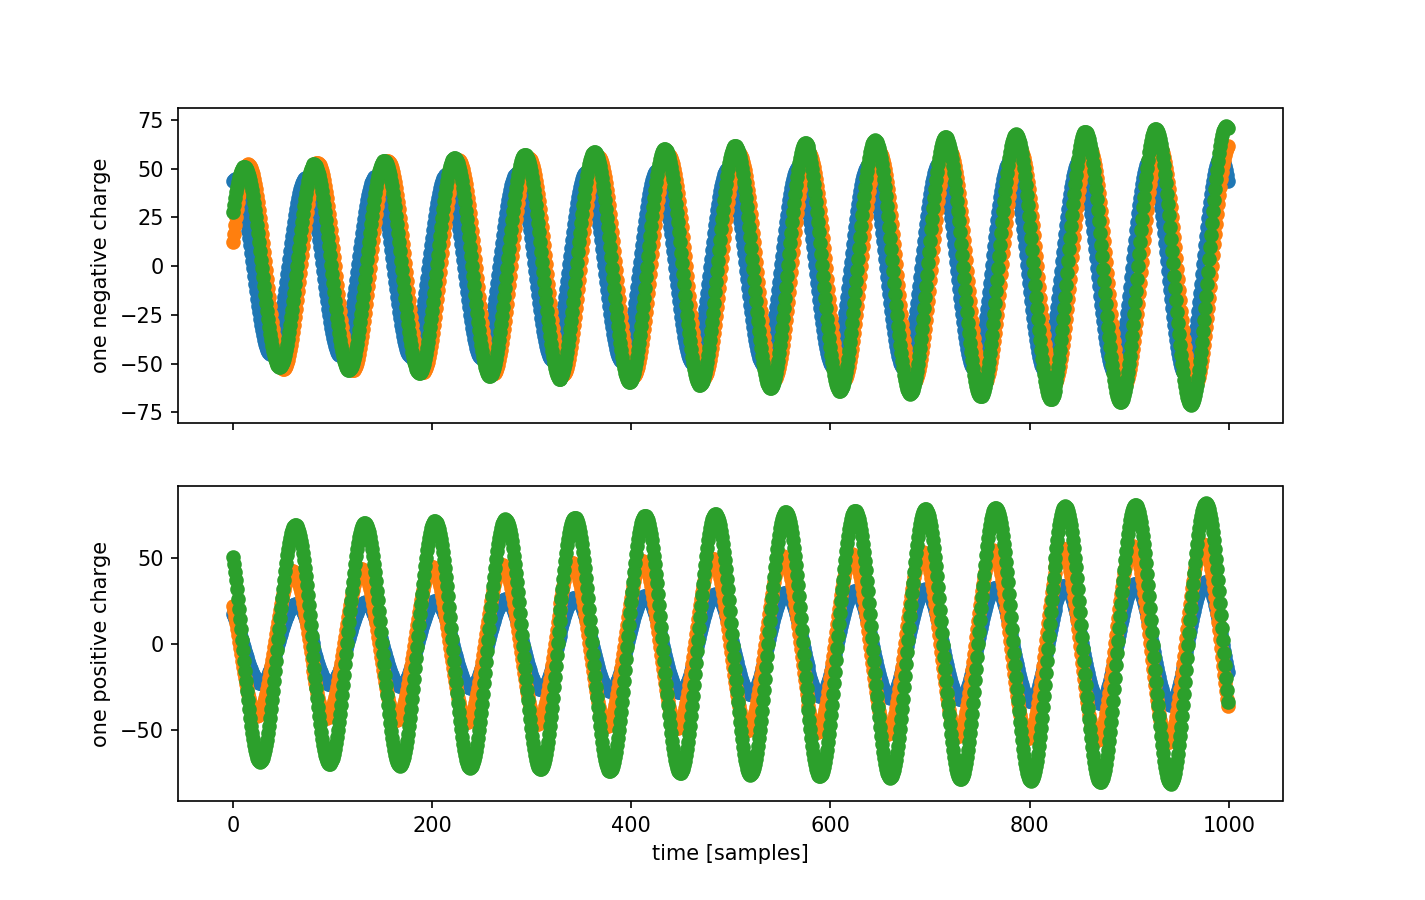

[Text(0, 0.5, 'one positive charge'), Text(0.5, 0, 'time [samples]')]

In [33]:
_,ax = plt.subplots(2,1,figsize=(9.5,6), sharex=True)
[ax[0].scatter(range(1000), dis_z_time[i][:1000]) for i in range(20,23)]
ax[0].set(ylabel='one negative charge')
[ax[1].scatter(range(1000), dis_z_time[i][:1000]) for i in range(230,233)]
ax[1].set(ylabel='one positive charge', xlabel='time [samples]')

### Response

In [6]:
bdf_resp = load_dir(dirname='/home/data_transfer/data_from_windows/20200320/Bead1/Discharge/Long_Response/', start_file=0, max_file=2000)

No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data


KeyboardInterrupt: 

In [75]:
resp_z2 = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_resp]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [72]:
resp_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_resp]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


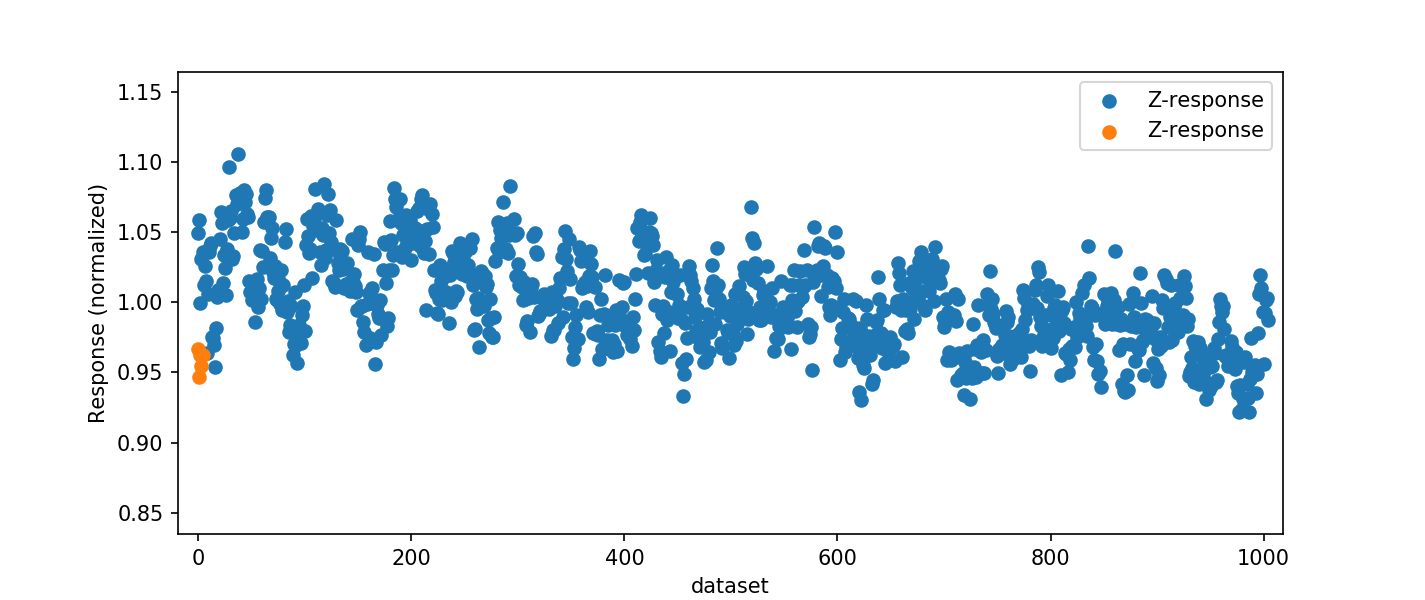

In [77]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(len(resp_z)),resp_z/np.mean(resp_z), label='Z-response')
ax.scatter(range(len(resp_z2)),resp_z2/np.mean(resp_z), label='Z-response')
ax.set(xlabel='dataset', ylabel='Response (normalized)')
ax.legend()

### Force sensitivity

In [5]:
bdf_resp = load_dir(dirname='/home/data_transfer/data_from_windows/20200320/Bead1/Discharge/New_Discharge/', start_file=0, max_file=2000)

No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
15  files in folder
15  files loaded


In [26]:
# dis_z2 = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_resp]
# dis_x2 = [np.std(bb.response_at_freq2('x', drive_freq=71)) for bb in  bdf_resp]
# dis_y2 = [np.std(bb.response_at_freq2('y', drive_freq=71)) for bb in  bdf_resp]
# _,ax = plt.subplots()
# ax.scatter(range(15), dis_z2/dis_z2[0]*6)
# ax.scatter(range(15), dis_x2/dis_x2[5]*6)
# ax.scatter(range(15), dis_y2/dis_y2[10]*6)

In [6]:
bdf_z = bdf_resp[:5]
bdf_x = bdf_resp[5:10]
bdf_y = bdf_resp[10:]
charges=6

In [27]:
freq = bdf_z[0].psd2('z')[0]
z_scale = np.sqrt(bdf_z[0].psd2('z')[1][freq==71])
# for bb in bdf_z:
#     z_scale += np.sqrt(bb.psd2('z')[1][freq==71])
# z_scale /= len(bdf_z)

freq = bdf_x[0].psd2('x')[0]
x_scale = np.sqrt(bdf_x[0].psd2('x')[1][freq==71])
# for bb in bdf_x:
#     x_scale += np.sqrt(bb.psd2('x')[1][freq==71])
# x_scale /= len(bdf_x)

freq = bdf_y[0].psd2('y')[0]
y_scale = np.sqrt(bdf_y[0].psd2('y')[1][freq==71])
# for bb in bdf_y:
#     y_scale += np.sqrt(bb.psd2('y')[1][freq==71])
# y_scale /= len(bdf_y)

force = charges * 1.6e-19 * 20 / 8e-3 * 0.63 * np.sqrt(10)# in Newtons
z_scale = force/z_scale
x_scale = force/x_scale
y_scale = force/y_scale

No height data
No electrodes data
No cantilever data
No laser power data
No height data
No electrodes data
No cantilever data
No laser power data


<IPython.core.display.Javascript object>


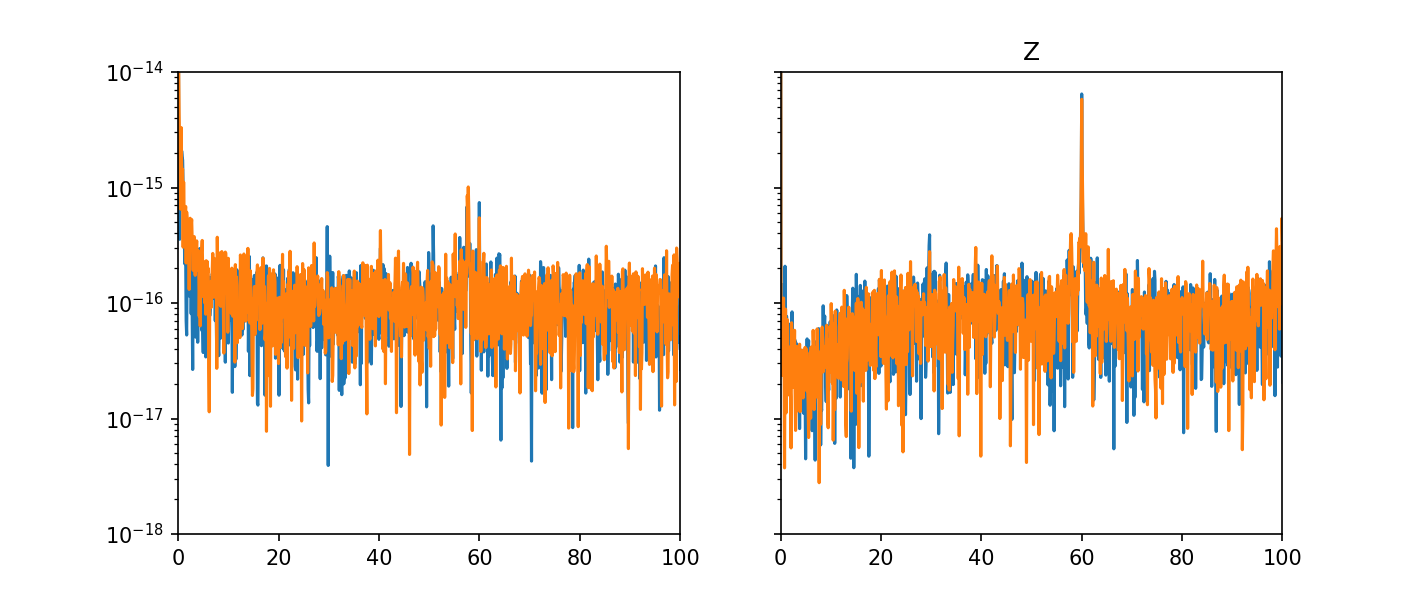

[(1e-18, 1e-14), (0, 100), Text(0.5, 1.0, 'Z')]

In [28]:
bb = BeadDataFile.BeadDataFile(fname=r'/data/new_trap/20200320/Bead1/InitialTest/Data33.h5')
bb1 = BeadDataFile.BeadDataFile(fname=r'/data/new_trap/20200320/Bead1/InitialTest/Data37.h5')
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True, sharey=True)
freq, fftx = bb.psd2('x')
freq, fftx1 = bb1.psd2('x')
ax[0].semilogy(freq,np.sqrt(fftx)*x_scale)
ax[0].semilogy(freq,np.sqrt(fftx1)*x_scale)
# ax[0].set(xlim=(0,1000), ylabel=r'Force [N]', title='X')
freq, fftz = bb.psd2('z')
freq, fftz1 = bb1.psd2('z')
ax[1].semilogy(freq,np.sqrt(fftz)*z_scale)
ax[1].semilogy(freq,np.sqrt(fftz1)*z_scale)
ax[1].set(xlim=(0,100), title='Z', ylim=(1e-18, 1e-14))

### Mass measurement

In [394]:
fname = r'/data/new_trap/20200320/Bead1/Discharge/Recharge2/Discharge_370.h5'
bb = BeadDataFile.BeadDataFile(fname=fname)

In [395]:
charges = 38
force = charges * 1.6e-19 * 20 / 8e-3 * 0.63  # in Newtons

t_short = 1
fsamp = 500
freq = 10
amp = force
dt = 1. / fsamp
nsamp = int(t_short / dt)
time = np.arange(nsamp) * dt
sig = amp * np.sin(2 * np.pi * freq * time)

<IPython.core.display.Javascript object>


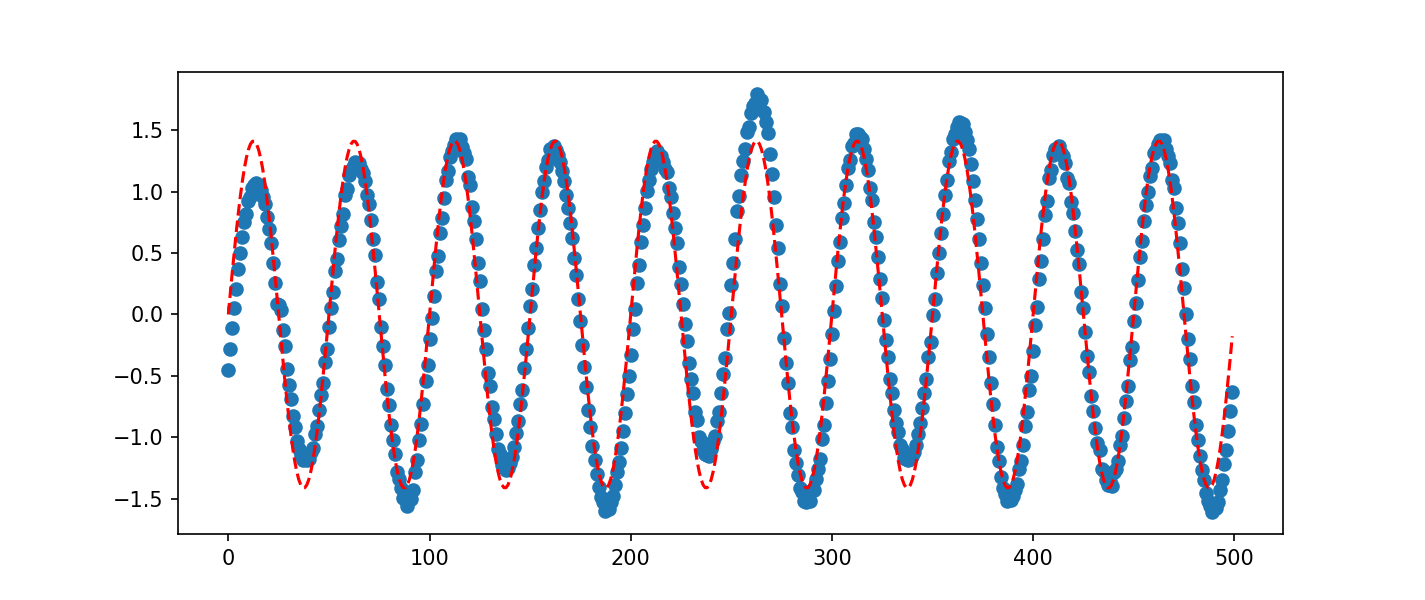

mass in pg:  470.57882569986896
power decrease [%] (peak to valley):  0.4152940182506513
force:  9.576e-15


In [401]:
nroll = 24
ff = np.roll(np.mean(bb.Iz.reshape(500,-1), axis=1), nroll)
_, ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(500), (ff-np.mean(ff))/np.std(ff))
ax.plot(range(500), (sig-np.mean(sig))/np.std(sig), 'r--')
print('mass in pg: ', 2*np.mean(ff)/(np.min(ff)-np.max(ff))*force/9.8*1e15) 
print('power decrease [%] (peak to valley): ', 100*(np.min(ff)-np.max(ff))/np.mean(ff))
print('force: ', force)

<IPython.core.display.Javascript object>


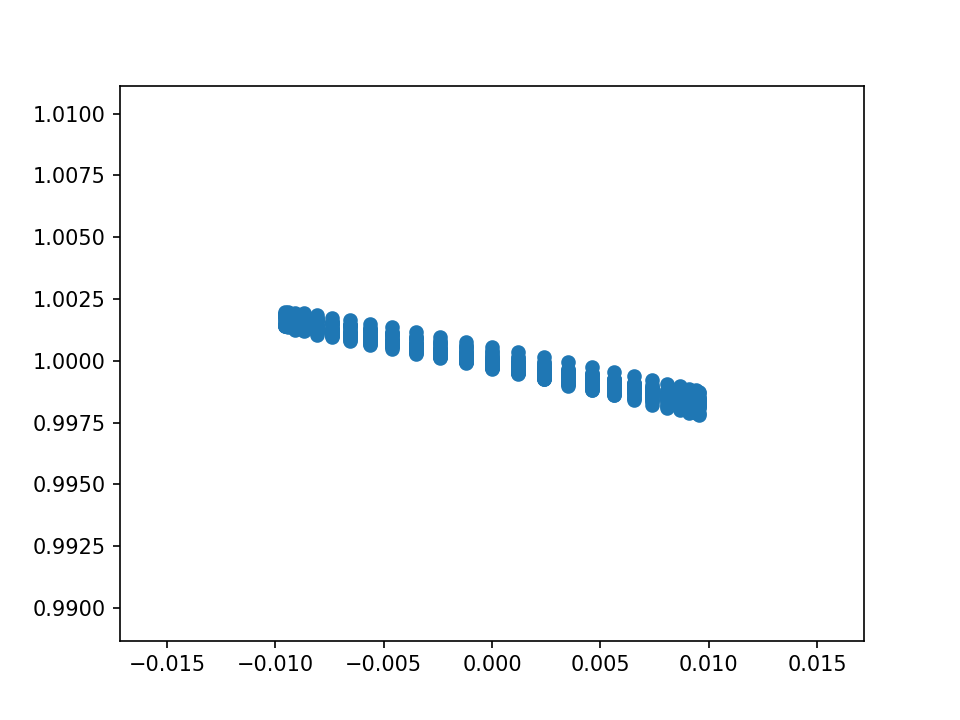

(565.1039710306287, array([[-8.61361406e-03, -5.15799108e-12],
        [-5.15799108e-12, -5.83249733e-05]]))

In [414]:
_,ax = plt.subplots()
ax.scatter(sig*1e12, ff/np.mean(ff))
a,V = np.polyfit(sig*1e12, ff/np.mean(ff),deg=1, cov=True)
1/-a[0]*100, np.sqrt(V)/a[0]

### Another method

<IPython.core.display.Javascript object>


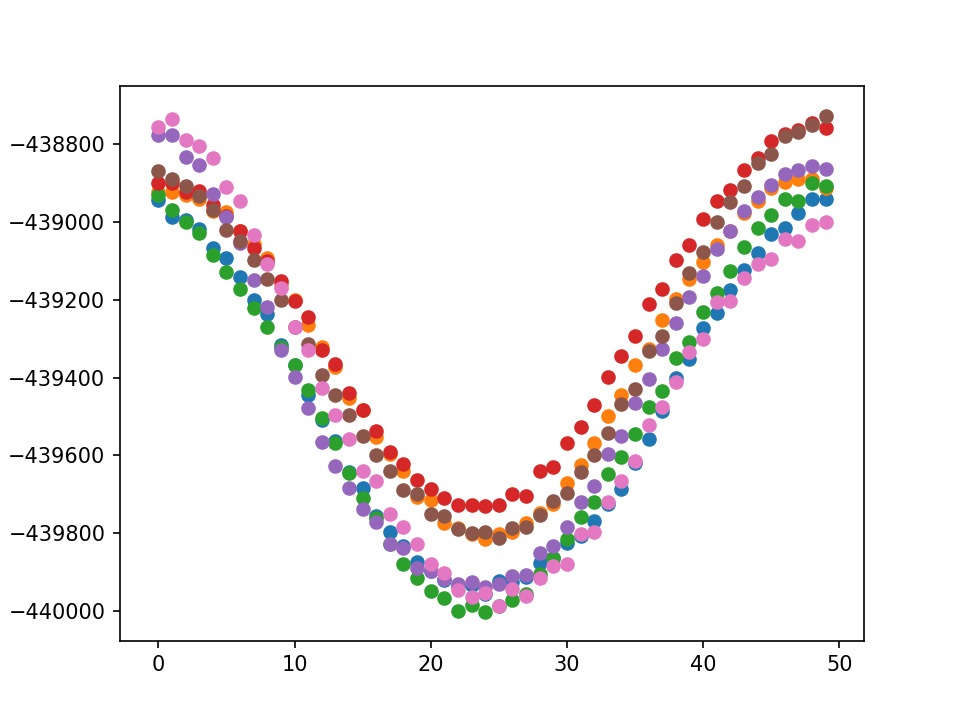

806.2847518861257 75.91770878286638


In [349]:
_,ax = plt.subplots()
## assuming 1Hz, 10V amplitude
def get_mass(bb, charges):
    ff = np.mean(bb.Iz.reshape(500,-1), axis=1)
    force = charges * 1.6e-19 * 20 / 8e-3 * 0.63  # in Newtons
    masses = []
    for i in range(2,9):
        subset = ff[i*50:(i+1)*50]
        masses.append(2*np.mean(subset)/(np.min(subset)-np.max(subset))*force/9.8*1e15)
        ax.scatter(range(len(subset)), subset)
    return masses
Ms = get_mass(bb, charges=38)
print(np.mean(Ms), np.std(Ms))

### A first look at the dataset

In [22]:
# data_bdfs = load_dir(dirname=r'/data/new_trap/20200306/Bead1/Shaking/Shaking368/', file_prefix='Shaking1_')
# data_bdfs2 = load_dir(dirname=r'/data/new_trap/20200306/Bead1/Shaking/Shaking370/', file_prefix='Shaking0', max_file=1000)
# data_bdfs2 = load_dir(dirname=r'/data/new_trap/20200320/Bead1/Shaking/Shaking376/', file_prefix='Shaking', max_file=500)
data_bdfs3 = load_dir(dirname=r'/data/new_trap/20200320/Bead1/Shaking/Shaking379/', file_prefix='Shaking', start_file=1000, max_file=500)

12922  files in folder
500  files loaded


In [20]:
del data_bdfs2[:]

In [18]:
freq = data_bdfs2[0].psd2('x')[0]
fftx1 = np.sqrt(data_bdfs2[0].psd2('x')[1])*x_scale
ffty1 = np.sqrt(data_bdfs2[0].psd2('y')[1])*y_scale
fftz1 = np.sqrt(data_bdfs2[0].psd2('z')[1])*z_scale
for i in range(1,500):
    fftx1 += np.sqrt(data_bdfs2[i].psd2('x')[1])*x_scale
    fftz1 += np.sqrt(data_bdfs2[i].psd2('z')[1])*z_scale
    ffty1 += np.sqrt(data_bdfs2[i].psd2('y')[1])*y_scale
fftx1 /= 500
ffty1 /= 500
fftz1 /= 500

In [23]:
fftx2 = np.sqrt(data_bdfs3[0].psd2('x')[1])*x_scale
ffty2 = np.sqrt(data_bdfs3[0].psd2('y')[1])*y_scale
fftz2 = np.sqrt(data_bdfs3[0].psd2('z')[1])*z_scale
for i in range(1,500):
    fftx2 += np.sqrt(data_bdfs3[i].psd2('x')[1])*x_scale
    fftz2 += np.sqrt(data_bdfs3[i].psd2('z')[1])*z_scale
    ffty2 += np.sqrt(data_bdfs3[i].psd2('y')[1])*y_scale
fftx2 /= 500
ffty2 /= 500
fftz2 /= 500

<IPython.core.display.Javascript object>


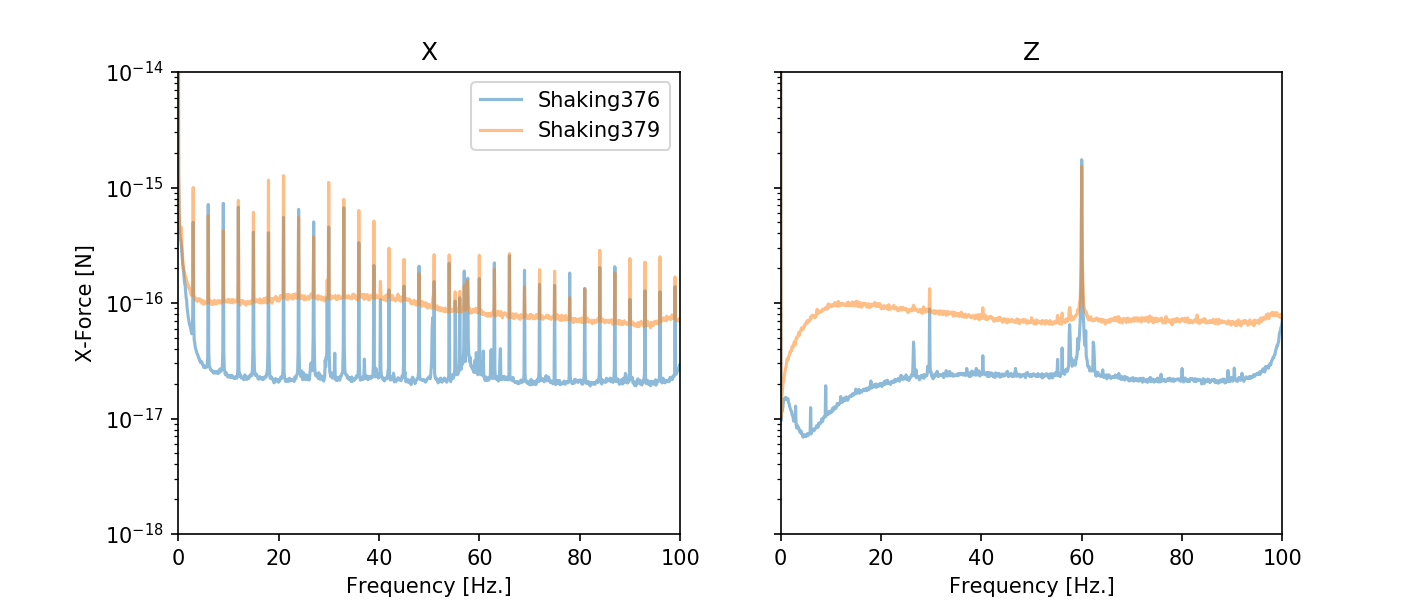

[(1e-18, 1e-14),
 (0, 100),
 Text(0.5, 0, 'Frequency [Hz.]'),
 Text(0.5, 1.0, 'Z')]

In [24]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True, sharex=True)
ax[0].semilogy(freq,fftx1, label=r'Shaking376', alpha=0.5)
ax[0].semilogy(freq,fftx2, label=r'Shaking379', alpha=0.5)
ax[0].set(xlim=(0,100), ylabel=r'X-Force [N]', title='X', xlabel='Frequency [Hz.]')
ax[0].legend()

ax[1].semilogy(freq,fftz1, alpha=0.5)
ax[1].semilogy(freq,fftz2, alpha=0.5)

ax[1].set(xlim=(0,100), ylim=(1e-18,1e-14), title='Z', xlabel='Frequency [Hz.]')

### Transfer function

In [228]:
# 7.6um German bead
fname = r'/data/new_trap/20200320/Bead1/TransFunc/TransFunc_X_m800k_150s.h5'
tf_x = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/TransFunc_Y_m800k_150s.h5'
tf_y = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/TransFunc_Z_m800k_150s.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)

tf_list = [tf_x, tf_y, tf_z]

No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data


<IPython.core.display.Javascript object>


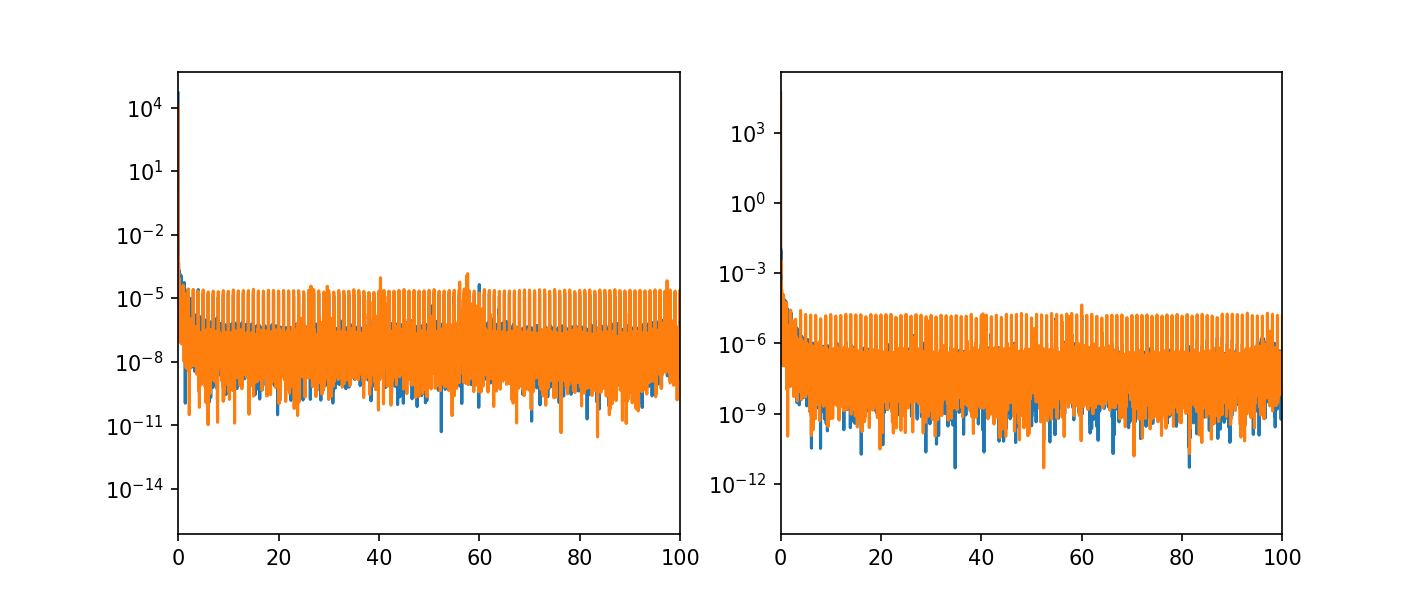

[(0, 100)]

In [230]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True)
ax[0].semilogy(*tf_x.psd2('x'))
ax[0].semilogy(*tf_y.psd2('y'))
ax[1].semilogy(*tf_z.psd2('x'))
ax[1].semilogy(*tf_x.psd2('x'))
ax[0].set(xlim=(0,100))

<IPython.core.display.Javascript object>


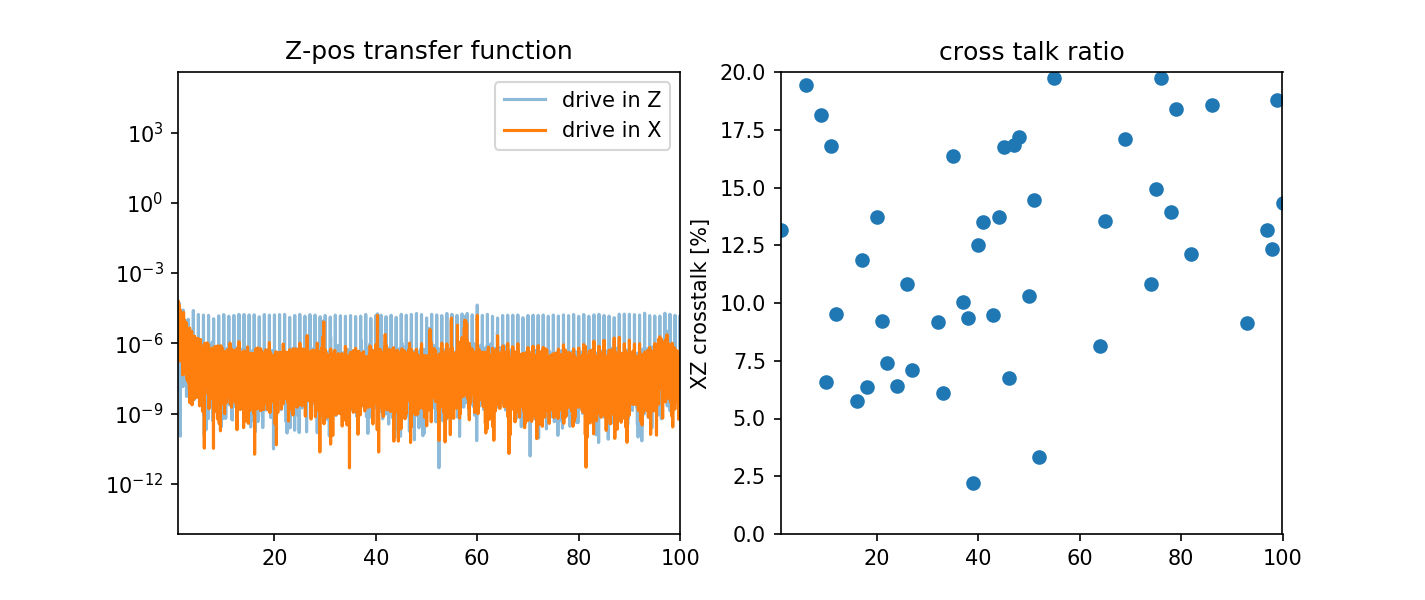

[(0, 20), Text(0, 0.5, 'XZ crosstalk [%]'), Text(0.5, 1.0, 'cross talk ratio')]

In [231]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
freq, psd_tx = tf_z.psd2('x')
freq, psd_tz = tf_x.psd2('x')
ax[0].semilogy(freq, psd_tz, alpha=0.5, label='drive in Z')
ax[0].semilogy(freq, psd_tx, label='drive in X')

fff = []
ratio = []
for ff,tx,tz in zip(freq,psd_tx,psd_tz):
    if ff%1==0:
        fff.append(ff)
        ratio.append(np.sqrt(tx/tz)*100)
ax[1].scatter(fff,ratio)
ax[0].set(xlim=(1,100),title='Z-pos transfer function')
ax[0].legend()
ax[1].set(ylim=(0,20), title='cross talk ratio', ylabel='XZ crosstalk [%]')

### Spin

No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


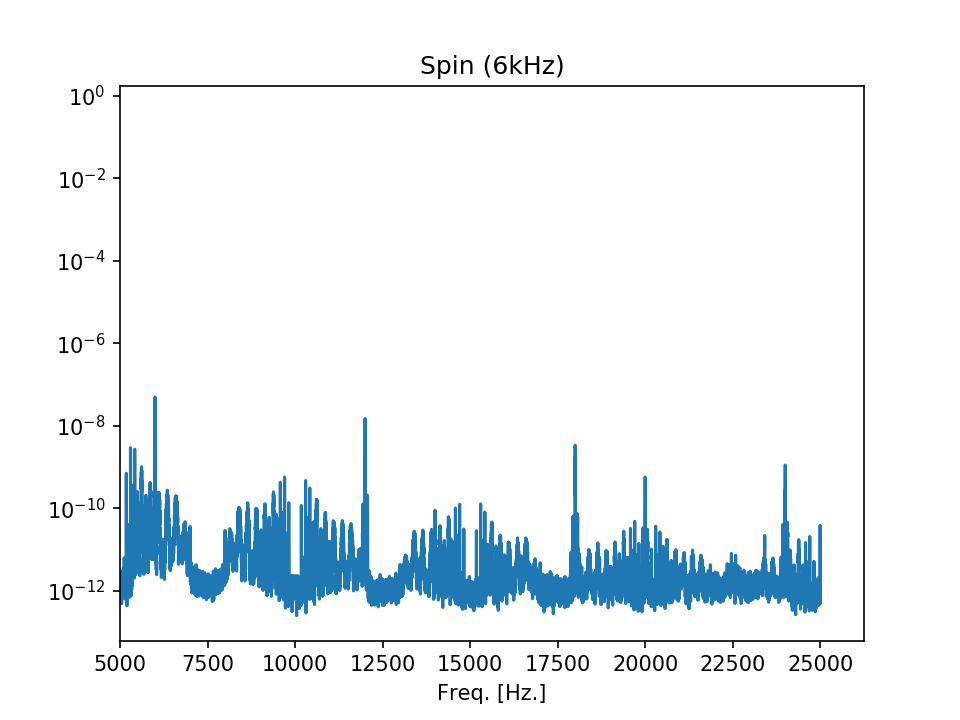

[(5000, 26250.0), Text(0.5, 0, 'Freq. [Hz.]'), Text(0.5, 1.0, 'Spin (6kHz)')]

In [48]:
bb = BeadDataFile.BeadDataFile(fname=r'/data/new_trap/20200306/Bead1/InitialTest/Data85.h5')
_,ax = plt.subplots()
ax.semilogy(*bb.welch_psd('spin',res=50000))
ax.set(xlim=(5000,None), title='Spin (6kHz)', xlabel='Freq. [Hz.]')

### Repeat TF

In [20]:
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Y_m100k_50s_7hz.h5'
bdf100 = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Y_m200k_50s_7hz.h5'
bdf200 = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Y_m300k_50s_7hz.h5'
bdf300 = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Y_m400k_50s_7hz.h5'
bdf400 = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Y_m500k_50s_7hz.h5'
bdf500 = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Y_m600k_50s_7hz.h5'
bdf600 = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Y_m700k_50s_7hz.h5'
bdf700 = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Y_m800k_50s_7hz.h5'
bdf800 = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Y_m900k_50s_7hz.h5'
bdf900 = BeadDataFile.BeadDataFile(fname)

No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data
No height data
No cantilever data
Error loading spinning data
No laser power data


<IPython.core.display.Javascript object>


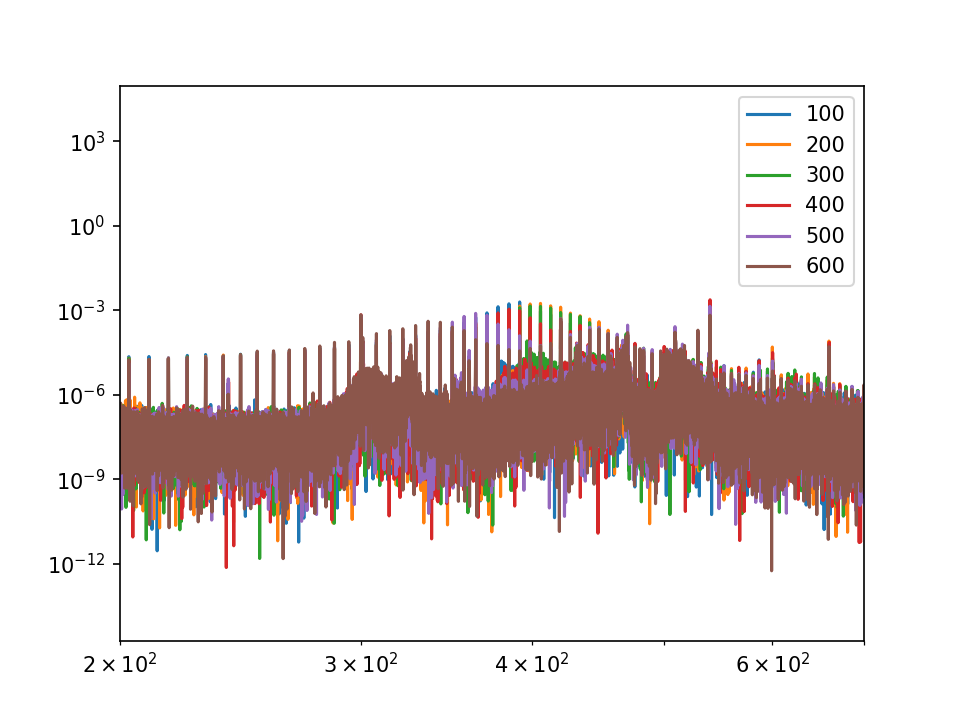

In [25]:
_, ax = plt.subplots()
ax.loglog(*bdf100.psd2('y'), label='100')
ax.loglog(*bdf200.psd2('y'), label='200')
ax.loglog(*bdf300.psd2('y'), label='300')
ax.loglog(*bdf400.psd2('y'), label='400')
ax.semilogy(*bdf500.psd2('y'), label='500')
ax.semilogy(*bdf600.psd2('y'), label='600')
# ax.semilogy(*bdf700.psd2('y'), label='700')
# ax.semilogy(*bdf800.psd2('y'), label='800')
# ax.semilogy(*bdf900.psd2('y'), label='900')
ax.set(xlim=(200,700))
ax.legend()

### Another mass measurement

In [26]:
bdf_discharge = load_dir(dirname='/home/data_transfer/data_from_windows/20200320/Bead1/Discharge/Recharge_and_Discharge_after_Shaking_20200401/')
dis_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_discharge]

180  files in folder
180  files loaded


<IPython.core.display.Javascript object>


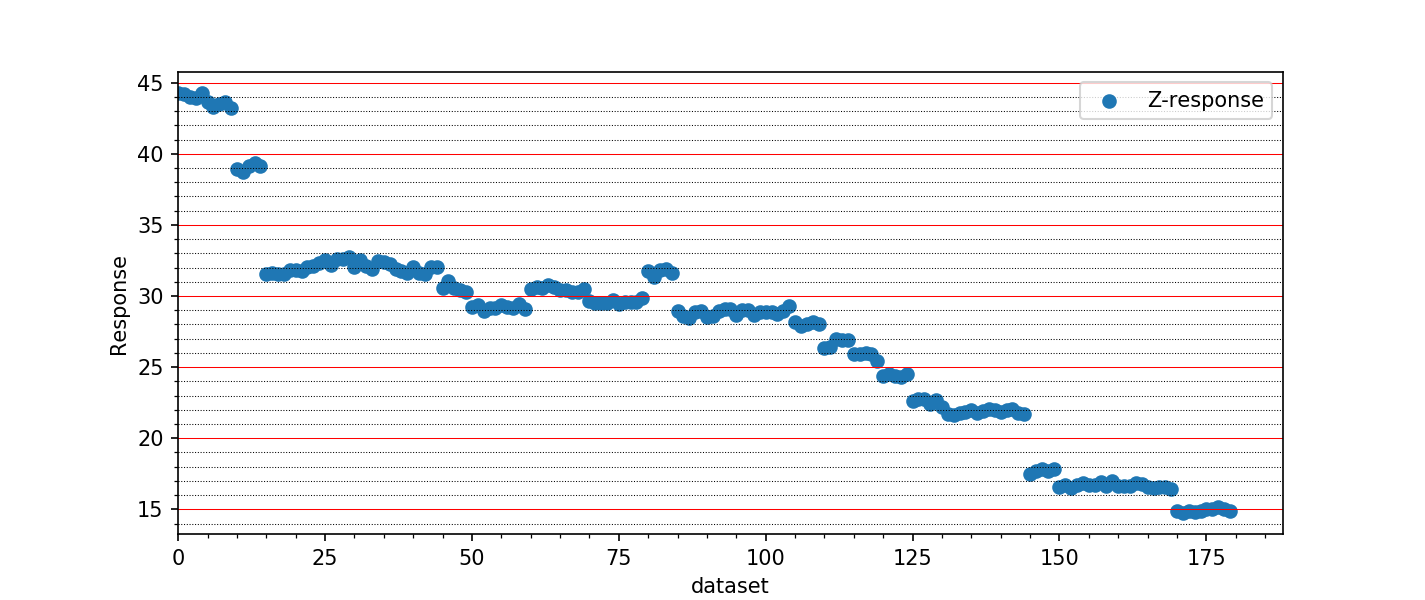

In [28]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(len(dis_z)),np.array(dis_z)/35-0.5, label='Z-response')
ax.set(xlabel='dataset', ylabel='Response', ylim=(None,None), xlim=(0,None))
ax.minorticks_on()
# Customize the major grid
ax.grid(axis='y', which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(axis='y', which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()

In [214]:
fname = r'/home/data_transfer/data_from_windows/20200320/Bead1/Mass/Discharge_18.h5'
bb = BeadDataFile.BeadDataFile(fname=fname)
charges = 14

force = charges * 1.6e-19 * 20 / 8e-3 * 0.63  # in Newtons
t_short = 1
fsamp = 500
freq = 10
amp = force
dt = 1. / fsamp
nsamp = int(t_short / dt)
time = np.arange(nsamp) * dt
sig = amp * np.sin(2 * np.pi * freq * time)

<IPython.core.display.Javascript object>


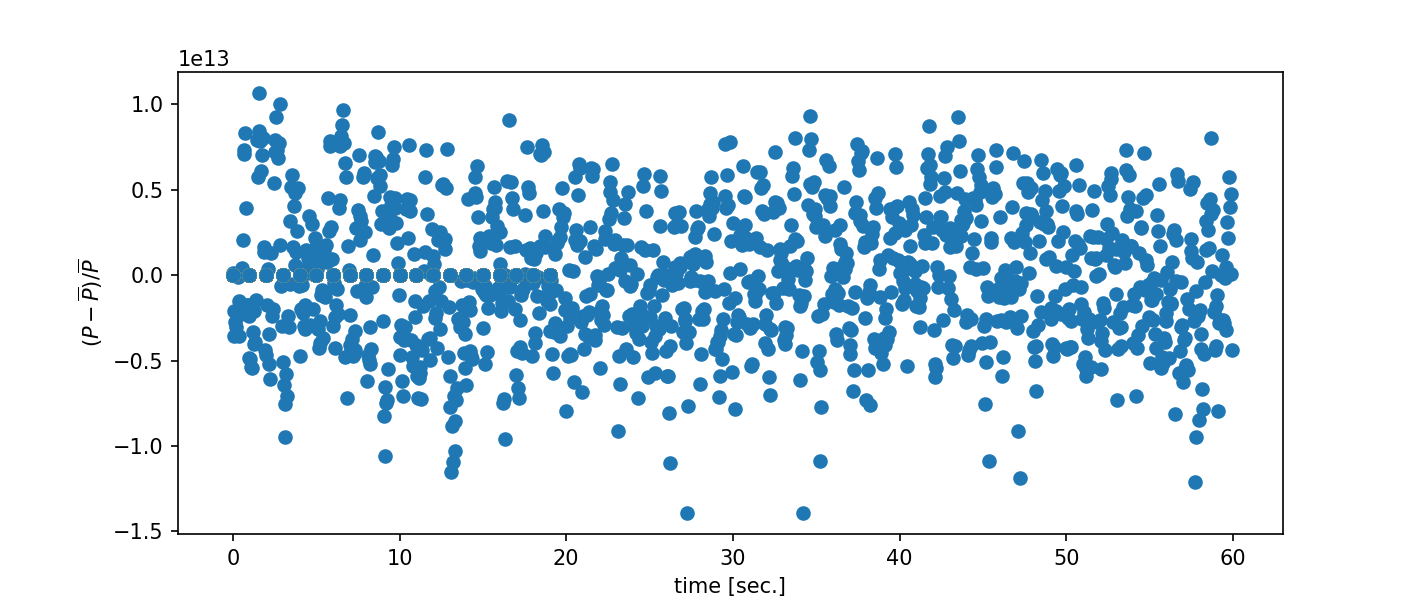

mass in pg:  220.41694513721788
power decrease [%] (peak to valley):  2458835379572081.5
force:  3.528e-15


In [215]:
nroll = 13
ff_mean = np.mean(bb.Iz)
ff = signal.detrend(np.roll(np.mean(bb.Iz.reshape(1200,-1), axis=1), nroll))
_, ax = plt.subplots(figsize=(9.5,4))
ax.scatter(np.arange(1200)*1/20, (ff-np.mean(ff))/np.mean(ff))
# ax.scatter(range(500), (sig-np.mean(sig))/np.std(sig))
ax.set(ylabel=r'$(P-\overline{P})/\overline{P}$', xlabel='time [sec.]')
print('mass in pg: ', 2*ff_mean/(np.min(ff)-np.max(ff))*force/9.8*1e15) 
print('power decrease [%] (peak to valley): ', 100*(np.min(ff)-np.max(ff))/np.mean(ff))
print('force: ', force)
plt.show()

In [218]:
fname = r'/data/new_trap/20200320/Bead1/Mass/Discharge_30.h5'
bb = BeadDataFile.BeadDataFile(fname=fname)
np.mean(get_mass(bb, charges=charges)), np.std(get_mass(bb, charges=charges))

(415.0286978300883, 88.12173760889763)

In [177]:
15000/15, 1000/15

(1000.0, 66.66666666666667)

In [195]:
from scipy.optimize import leastsq
## assuming 1Hz, 10V amplitude
def get_mass(bb, charges):
    ff = np.mean(bb.Iz.reshape(1200,-1), axis=1)
    force = charges * 1.6e-19 * 20 / 8e-3 * 0.63  # in Newtons
    masses = []
    cycle = 20
    for i in range(10,50):
        subset = ff[i*cycle:(i+1)*cycle]
        masses.append(2*np.mean(subset)/(np.min(subset)-np.max(subset))*force/9.8*1e15)
        ax.scatter(range(len(subset)), subset)
    return masses

def get_mass2(bb, charges):
    force = charges * 1.6e-19 * 20 / 8e-3 * 0.63  # in Newtons
    data = bb.Iz[10000:140000]
    data = data/np.mean(data)
    t = np.arange(len(data))*1/5000.

    optimize_func = lambda x: x[0]*np.sin(2*np.pi*t*[1]+x[2]) - data
    est_amp, est_freq, est_phase = leastsq(optimize_func, [0.1, 1, 3])[0]
    return -1/est_amp*force/9.8*1e15

In [222]:
bdf_discharge = load_dir(dirname='/home/data_transfer/data_from_windows/20200320/Bead1/Discharge/Discharge_after_Mass_20200402/')
dis_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_discharge]

121  files in folder
121  files loaded


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


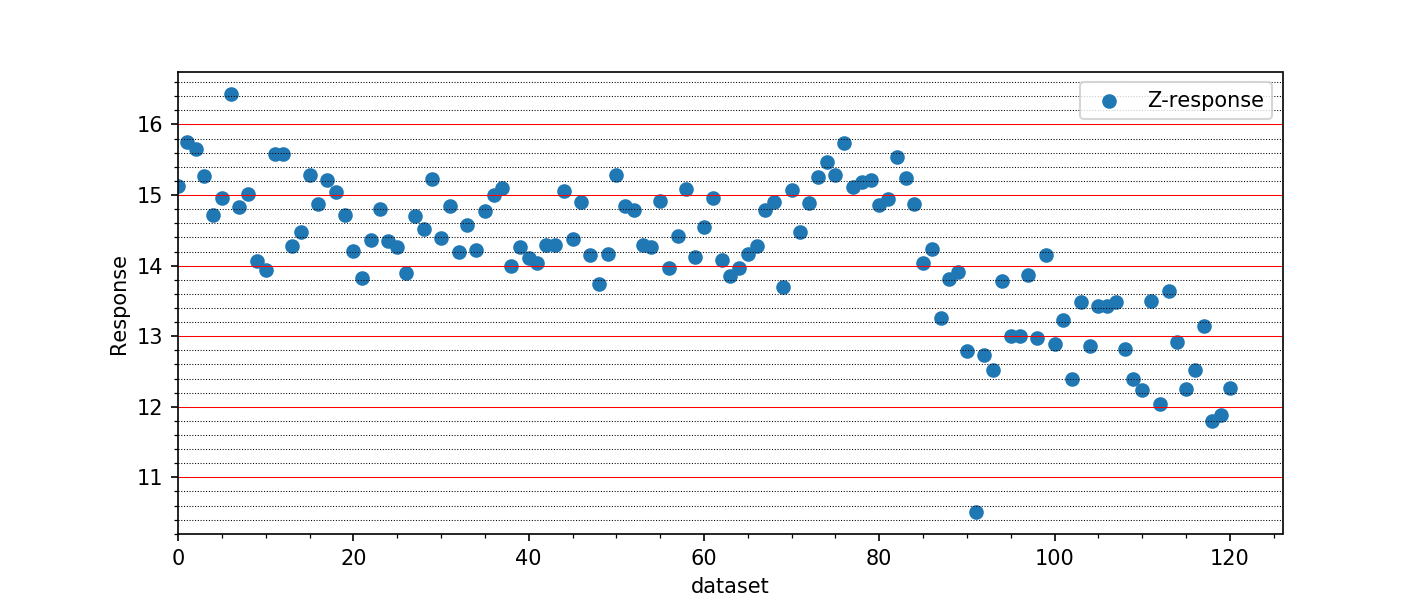

In [223]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(len(dis_z)),np.array(dis_z)/35-0.5, label='Z-response')
ax.set(xlabel='dataset', ylabel='Response', ylim=(None,None), xlim=(0,None))
ax.minorticks_on()
# Customize the major grid
ax.grid(axis='y', which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(axis='y', which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()